# 3-Layer CNN for Colored MNIST Classification

This notebook implements a 3-layer Convolutional Neural Network to train and test on the colored MNIST dataset.

## 1. Import Required Libraries

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

PyTorch version: 2.9.0+cu126
CUDA available: True
Using device: cuda


In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Load Data from NPZ Files

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Load training data
train_data = np.load('/content/drive/MyDrive/cvtask/data_rg/train_data_rg.npz')
X_train = train_data['images']
y_train = train_data['labels']

# Load test dataset 1 (rg.npz)
test_data1 = np.load('/content/drive/MyDrive/cvtask/data_rg/test_data_rg.npz')
X_test1 = test_data1['images']
y_test1 = test_data1['labels']

# Load test dataset 2 (gr.npz)
test_data2 = np.load('/content/drive/MyDrive/cvtask/data_gr/test_data_gr.npz')
X_test2 = test_data2['images']
y_test2 = test_data2['labels']

# Load test dataset 3 (gr3.npz)
test_data3 = np.load('/content/drive/MyDrive/cvtask/data_gr3/test_data_gr3.npz')
X_test3 = test_data3['images']
y_test3 = test_data3['labels']

# Load test dataset 4 (gr4.npz)
test_data4 = np.load('/content/drive/MyDrive/cvtask/data_gr4/test_data_gr4.npz')
X_test4 = test_data4['images']
y_test4 = test_data4['labels']

# Load test dataset 5 (bg2.npz)
test_data5 = np.load('/content/drive/MyDrive/cvtask/data_bg2/test_data_bg2.npz')
X_test5 = test_data5['images']
y_test5 = test_data5['labels']

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"\nTest dataset 1 shape: {X_test1.shape}")
print(f"Test dataset 1 labels shape: {y_test1.shape}")
print(f"\nTest dataset 2 shape: {X_test2.shape}")
print(f"Test dataset 2 labels shape: {y_test2.shape}")
print(f"\nTest dataset 3 shape: {X_test3.shape}")
print(f"Test dataset 3 labels shape: {y_test3.shape}")
print(f"\nTest dataset 4 shape: {X_test4.shape}")
print(f"Test dataset 4 labels shape: {y_test4.shape}")
print(f"\nTest dataset 5 shape: {X_test5.shape}")
print(f"Test dataset 5 labels shape: {y_test5.shape}")
print(f"\nNumber of classes: {len(np.unique(y_train))}")

Training data shape: (60000, 28, 28, 3)
Training labels shape: (60000,)

Test dataset 1 shape: (10000, 28, 28, 3)
Test dataset 1 labels shape: (10000,)

Test dataset 2 shape: (10000, 28, 28, 3)
Test dataset 2 labels shape: (10000,)

Test dataset 3 shape: (10000, 28, 28, 3)
Test dataset 3 labels shape: (10000,)

Test dataset 4 shape: (10000, 28, 28, 3)
Test dataset 4 labels shape: (10000,)

Test dataset 5 shape: (10000, 28, 28, 3)
Test dataset 5 labels shape: (10000,)

Number of classes: 10


## 3. Preprocess and Prepare Data

In [97]:
# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test1 = X_test1.astype('float32') / 255.0
X_test2 = X_test2.astype('float32') / 255.0
X_test3 = X_test3.astype('float32') / 255.0
X_test4 = X_test4.astype('float32') / 255.0
X_test5 = X_test5.astype('float32') / 255.0

# Create validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

# Convert to PyTorch tensors and change format from (N, H, W, C) to (N, C, H, W)
X_train_tensor = torch.FloatTensor(X_train).permute(0, 3, 1, 2)
X_val_tensor = torch.FloatTensor(X_val).permute(0, 3, 1, 2)
X_test1_tensor = torch.FloatTensor(X_test1).permute(0, 3, 1, 2)
X_test2_tensor = torch.FloatTensor(X_test2).permute(0, 3, 1, 2)
X_test3_tensor = torch.FloatTensor(X_test3).permute(0, 3, 1, 2)
X_test4_tensor = torch.FloatTensor(X_test4).permute(0, 3, 1, 2)
X_test5_tensor = torch.FloatTensor(X_test5).permute(0, 3, 1, 2)

y_train_tensor = torch.LongTensor(y_train)
y_val_tensor = torch.LongTensor(y_val)
y_test1_tensor = torch.LongTensor(y_test1)
y_test2_tensor = torch.LongTensor(y_test2)
y_test3_tensor = torch.LongTensor(y_test3)
y_test4_tensor = torch.LongTensor(y_test4)
y_test5_tensor = torch.LongTensor(y_test5)

# Create DataLoaders
batch_size = 128
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test1_dataset = TensorDataset(X_test1_tensor, y_test1_tensor)
test2_dataset = TensorDataset(X_test2_tensor, y_test2_tensor)
test3_dataset = TensorDataset(X_test3_tensor, y_test3_tensor)
test4_dataset = TensorDataset(X_test4_tensor, y_test4_tensor)
test5_dataset = TensorDataset(X_test5_tensor, y_test5_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test1_loader = DataLoader(test1_dataset, batch_size=batch_size, shuffle=False)
test2_loader = DataLoader(test2_dataset, batch_size=batch_size, shuffle=False)
test3_loader = DataLoader(test3_dataset, batch_size=batch_size, shuffle=False)
test4_loader = DataLoader(test4_dataset, batch_size=batch_size, shuffle=False)
test5_loader = DataLoader(test5_dataset, batch_size=batch_size, shuffle=False)

print(f"Training set: {X_train_tensor.shape}")
print(f"Validation set: {X_val_tensor.shape}")
print(f"Test set 1: {X_test1_tensor.shape}")
print(f"Test set 2: {X_test2_tensor.shape}")
print(f"Test set 3: {X_test3_tensor.shape}")
print(f"Test set 4: {X_test4_tensor.shape}")
print(f"Test set 5: {X_test5_tensor.shape}")
print(f"Input shape: {X_train_tensor.shape[1:]}")

Training set: torch.Size([54000, 3, 28, 28])
Validation set: torch.Size([6000, 3, 28, 28])
Test set 1: torch.Size([10000, 3, 28, 28])
Test set 2: torch.Size([10000, 3, 28, 28])
Test set 3: torch.Size([10000, 3, 28, 28])
Test set 4: torch.Size([10000, 3, 28, 28])
Test set 5: torch.Size([10000, 3, 28, 28])
Input shape: torch.Size([3, 28, 28])


## 4. Build the 3-Layer CNN Model

In [98]:
class CNN3Layer(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN3Layer, self).__init__()

        # First Convolutional Layer
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)

        # Second Convolutional Layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)

        # Third Convolutional Layer
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 3 * 3, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # First conv block
        x = self.pool1(F.relu(self.conv1(x)))

        # Second conv block
        x = self.pool2(F.relu(self.conv2(x)))

        # Third conv block
        x = self.pool3(F.relu(self.conv3(x)))

        # Flatten
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Initialize model and move to device
model = CNN3Layer(num_classes=10).to(device)

# Display model architecture
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters()):,}")

CNN3Layer(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=576, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Total parameters: 131,466


## 5. Compile the Model

In [99]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Model compiled successfully!")
print(f"Optimizer: Adam")
print(f"Loss function: CrossEntropyLoss")

Model compiled successfully!
Optimizer: Adam
Loss function: CrossEntropyLoss


## 6. Train the Model

In [100]:
# Training parameters
epochs = 20

# Lists to store history
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []

# Training loop
for epoch in range(epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)
        loss = criterion(output, target)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Statistics
        train_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        train_total += target.size(0)
        train_correct += (predicted == target).sum().item()

    # Calculate average training metrics
    avg_train_loss = train_loss / len(train_loader)
    train_accuracy = train_correct / train_total

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)

            val_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            val_total += target.size(0)
            val_correct += (predicted == target).sum().item()

    # Calculate average validation metrics
    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = val_correct / val_total

    # Store history
    train_loss_history.append(avg_train_loss)
    train_acc_history.append(train_accuracy)
    val_loss_history.append(avg_val_loss)
    val_acc_history.append(val_accuracy)

    # Print epoch results
    print(f'Epoch [{epoch+1}/{epochs}] - '
          f'Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f} - '
          f'Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print("\nTraining completed!")

Epoch [1/20] - Train Loss: 0.3772, Train Acc: 0.8559 - Val Loss: 0.0441, Val Acc: 0.9870
Epoch [2/20] - Train Loss: 0.0634, Train Acc: 0.9806 - Val Loss: 0.0369, Val Acc: 0.9893
Epoch [3/20] - Train Loss: 0.0404, Train Acc: 0.9878 - Val Loss: 0.0175, Val Acc: 0.9938
Epoch [4/20] - Train Loss: 0.0303, Train Acc: 0.9907 - Val Loss: 0.0127, Val Acc: 0.9955
Epoch [5/20] - Train Loss: 0.0219, Train Acc: 0.9935 - Val Loss: 0.0104, Val Acc: 0.9965
Epoch [6/20] - Train Loss: 0.0190, Train Acc: 0.9943 - Val Loss: 0.0080, Val Acc: 0.9967
Epoch [7/20] - Train Loss: 0.0157, Train Acc: 0.9951 - Val Loss: 0.0061, Val Acc: 0.9977
Epoch [8/20] - Train Loss: 0.0140, Train Acc: 0.9959 - Val Loss: 0.0064, Val Acc: 0.9973
Epoch [9/20] - Train Loss: 0.0120, Train Acc: 0.9965 - Val Loss: 0.0073, Val Acc: 0.9972
Epoch [10/20] - Train Loss: 0.0102, Train Acc: 0.9971 - Val Loss: 0.0064, Val Acc: 0.9972
Epoch [11/20] - Train Loss: 0.0093, Train Acc: 0.9969 - Val Loss: 0.0071, Val Acc: 0.9975
Epoch [12/20] - Tra

## 7. Evaluate on Test Dataset 1

In [101]:
# Evaluate on test dataset 1 (no learning - evaluation mode only)
model.eval()
test1_loss = 0.0
test1_correct = 0
test1_total = 0

with torch.no_grad():
    for data, target in test1_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        loss = criterion(output, target)

        test1_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        test1_total += target.size(0)
        test1_correct += (predicted == target).sum().item()

avg_test1_loss = test1_loss / len(test1_loader)
test1_accuracy = test1_correct / test1_total

print(f"\nTest Dataset 1 Results:")
print(f"Test Loss: {avg_test1_loss:.4f}")
print(f"Test Accuracy: {test1_accuracy:.4f} ({test1_accuracy*100:.2f}%)")


Test Dataset 1 Results:
Test Loss: 0.0071
Test Accuracy: 0.9981 (99.81%)


## 8. Predictions and Visualization - Test Dataset 1

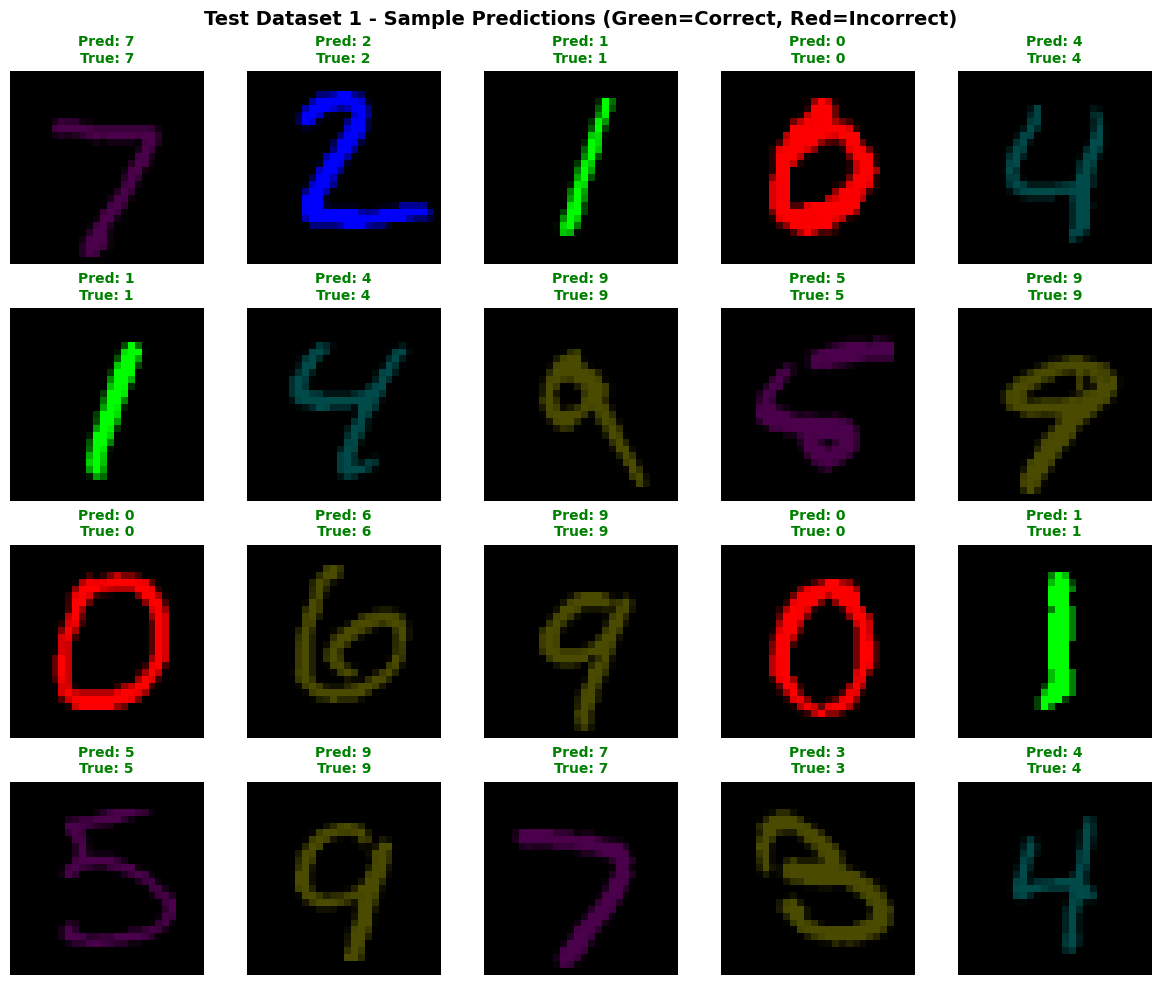


Test Dataset 1 - Correct predictions: 9981/10000 (99.81%)


In [102]:
# Make predictions on test dataset 1 (no learning)
model.eval()
test1_predictions = []
test1_targets = []

with torch.no_grad():
    for data, target in test1_loader:
        data = data.to(device)
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        test1_predictions.extend(predicted.cpu().numpy())
        test1_targets.extend(target.numpy())

predicted_classes_test1 = np.array(test1_predictions)
y_test1_array = np.array(test1_targets)

# Visualize some predictions from test dataset 1
num_samples = 20
fig, axes = plt.subplots(4, 5, figsize=(12, 10))
axes = axes.ravel()

for i in range(num_samples):
    img_display = X_test1[i]

    axes[i].imshow(img_display)
    axes[i].axis('off')

    pred_label = predicted_classes_test1[i]
    true_label = y_test1_array[i]

    color = 'green' if pred_label == true_label else 'red'
    axes[i].set_title(f'Pred: {pred_label}\nTrue: {true_label}',
                      fontsize=10, color=color, fontweight='bold')

plt.suptitle('Test Dataset 1 - Sample Predictions (Green=Correct, Red=Incorrect)',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

correct = np.sum(predicted_classes_test1 == y_test1_array)
total = len(y_test1_array)
print(f"\nTest Dataset 1 - Correct predictions: {correct}/{total} ({correct/total*100:.2f}%)")

## 9. Evaluate on Test Dataset 2

In [103]:
# Evaluate on test dataset 2 (no learning - evaluation mode only)
model.eval()
test2_loss = 0.0
test2_correct = 0
test2_total = 0

with torch.no_grad():
    for data, target in test2_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        loss = criterion(output, target)

        test2_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        test2_total += target.size(0)
        test2_correct += (predicted == target).sum().item()

avg_test2_loss = test2_loss / len(test2_loader)
test2_accuracy = test2_correct / test2_total

print(f"\nTest Dataset 2 Results:")
print(f"Test Loss: {avg_test2_loss:.4f}")
print(f"Test Accuracy: {test2_accuracy:.4f} ({test2_accuracy*100:.2f}%)")


Test Dataset 2 Results:
Test Loss: 10.6241
Test Accuracy: 0.7866 (78.66%)


## 10. Predictions and Visualization - Test Dataset 2

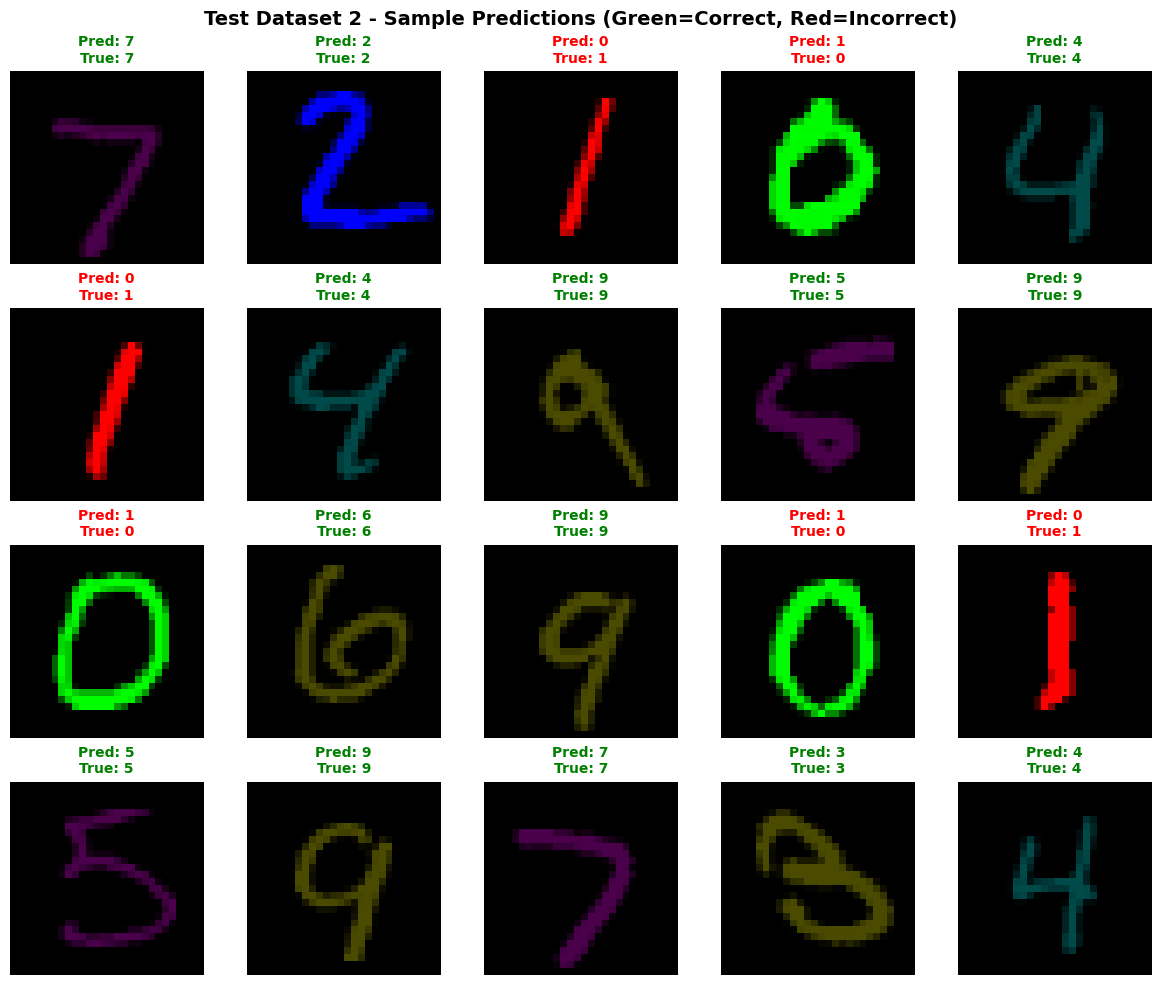


Test Dataset 2 - Correct predictions: 7866/10000 (78.66%)


In [104]:
# Make predictions on test dataset 2 (no learning)
model.eval()
test2_predictions = []
test2_targets = []

with torch.no_grad():
    for data, target in test2_loader:
        data = data.to(device)
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        test2_predictions.extend(predicted.cpu().numpy())
        test2_targets.extend(target.numpy())

predicted_classes_test2 = np.array(test2_predictions)
y_test2_array = np.array(test2_targets)

# Visualize some predictions from test dataset 2
num_samples = 20
fig, axes = plt.subplots(4, 5, figsize=(12, 10))
axes = axes.ravel()

for i in range(num_samples):
    img_display = X_test2[i]

    axes[i].imshow(img_display)
    axes[i].axis('off')

    pred_label = predicted_classes_test2[i]
    true_label = y_test2_array[i]

    color = 'green' if pred_label == true_label else 'red'
    axes[i].set_title(f'Pred: {pred_label}\nTrue: {true_label}',
                      fontsize=10, color=color, fontweight='bold')

plt.suptitle('Test Dataset 2 - Sample Predictions (Green=Correct, Red=Incorrect)',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

correct = np.sum(predicted_classes_test2 == y_test2_array)
total = len(y_test2_array)
print(f"\nTest Dataset 2 - Correct predictions: {correct}/{total} ({correct/total*100:.2f}%)")

## 11. Evaluate on Test Dataset 3


In [105]:
# Evaluate on test dataset 3 (no learning - evaluation mode only)
model.eval()
test3_loss = 0.0
test3_correct = 0
test3_total = 0

with torch.no_grad():
    for data, target in test3_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        loss = criterion(output, target)

        test3_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        test3_total += target.size(0)
        test3_correct += (predicted == target).sum().item()

avg_test3_loss = test3_loss / len(test3_loader)
test3_accuracy = test3_correct / test3_total

print(f"\nTest Dataset 3 Results:")
print(f"Test Loss: {avg_test3_loss:.4f}")
print(f"Test Accuracy: {test3_accuracy:.4f} ({test3_accuracy*100:.2f}%)")


Test Dataset 3 Results:
Test Loss: 11.8500
Test Accuracy: 0.7235 (72.35%)


## Predicting and visualising - Dataset 3


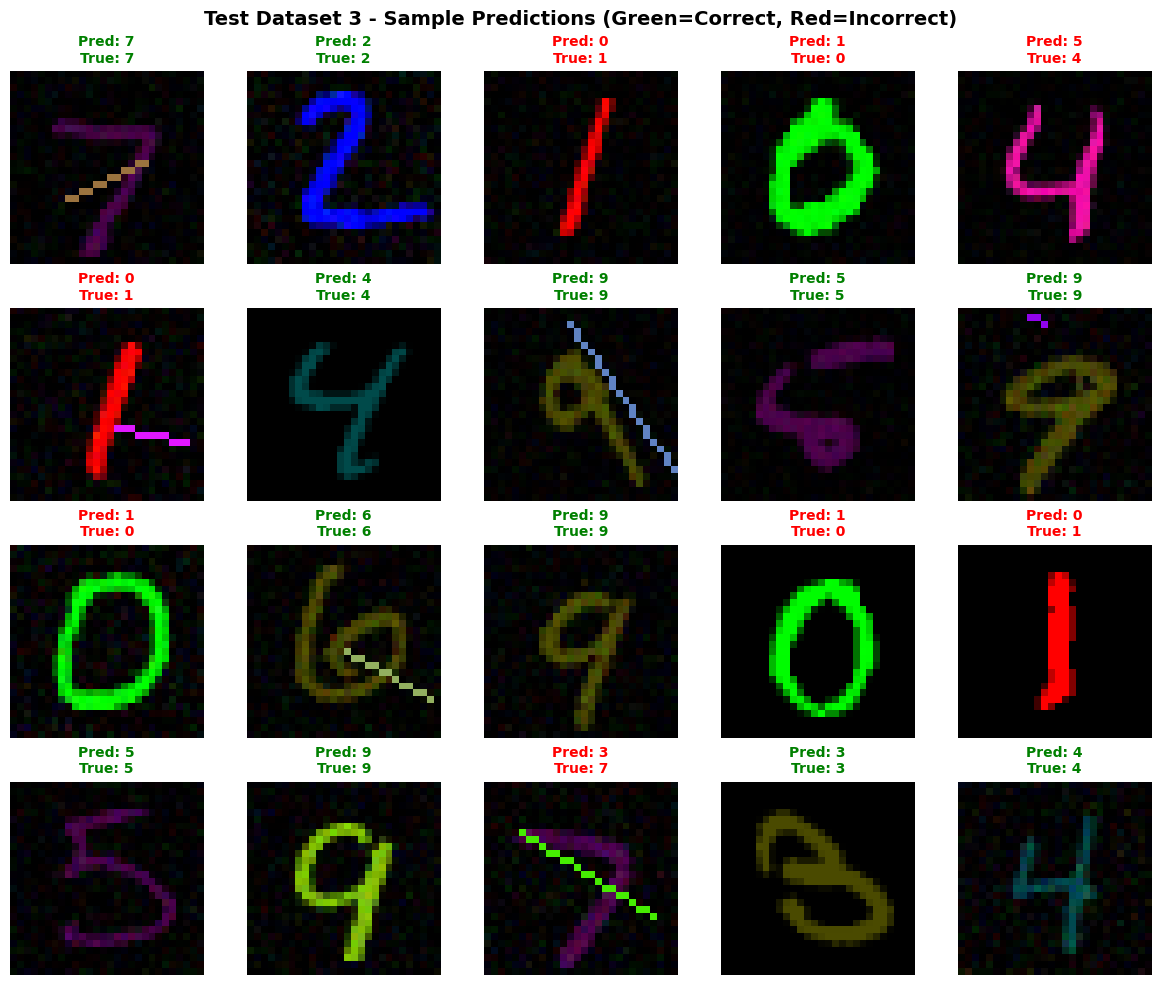


Test Dataset 3 - Correct predictions: 7235/10000 (72.35%)


In [106]:
# Make predictions on test dataset 3 (no learning)
model.eval()
test3_predictions = []
test3_targets = []

with torch.no_grad():
    for data, target in test3_loader:
        data = data.to(device)
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        test3_predictions.extend(predicted.cpu().numpy())
        test3_targets.extend(target.numpy())

predicted_classes_test3 = np.array(test3_predictions)
y_test3_array = np.array(test3_targets)

# Visualize some predictions from test dataset 3
num_samples = 20
fig, axes = plt.subplots(4, 5, figsize=(12, 10))
axes = axes.ravel()

for i in range(num_samples):
    img_display = X_test3[i]

    axes[i].imshow(img_display)
    axes[i].axis('off')

    pred_label = predicted_classes_test3[i]
    true_label = y_test3_array[i]

    color = 'green' if pred_label == true_label else 'red'
    axes[i].set_title(f'Pred: {pred_label}\nTrue: {true_label}',
                      fontsize=10, color=color, fontweight='bold')

plt.suptitle('Test Dataset 3 - Sample Predictions (Green=Correct, Red=Incorrect)',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

correct = np.sum(predicted_classes_test3 == y_test3_array)
total = len(y_test3_array)
print(f"\nTest Dataset 3 - Correct predictions: {correct}/{total} ({correct/total*100:.2f}%)")

## 11. Evaluate on Test Dataset 4



In [107]:
# Evaluate on test dataset 4 (no learning - evaluation mode only)
model.eval()
test4_loss = 0.0
test4_correct = 0
test4_total = 0

with torch.no_grad():
    for data, target in test4_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        loss = criterion(output, target)

        test4_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        test4_total += target.size(0)
        test4_correct += (predicted == target).sum().item()

avg_test4_loss = test4_loss / len(test4_loader)
test4_accuracy = test4_correct / test4_total

print(f"\nTest Dataset 4 Results:")
print(f"Test Loss: {avg_test4_loss:.4f}")
print(f"Test Accuracy: {test4_accuracy:.4f} ({test4_accuracy*100:.2f}%)")


Test Dataset 4 Results:
Test Loss: 11.9159
Test Accuracy: 0.6885 (68.85%)


## Predicting and visualising - Dataset 4



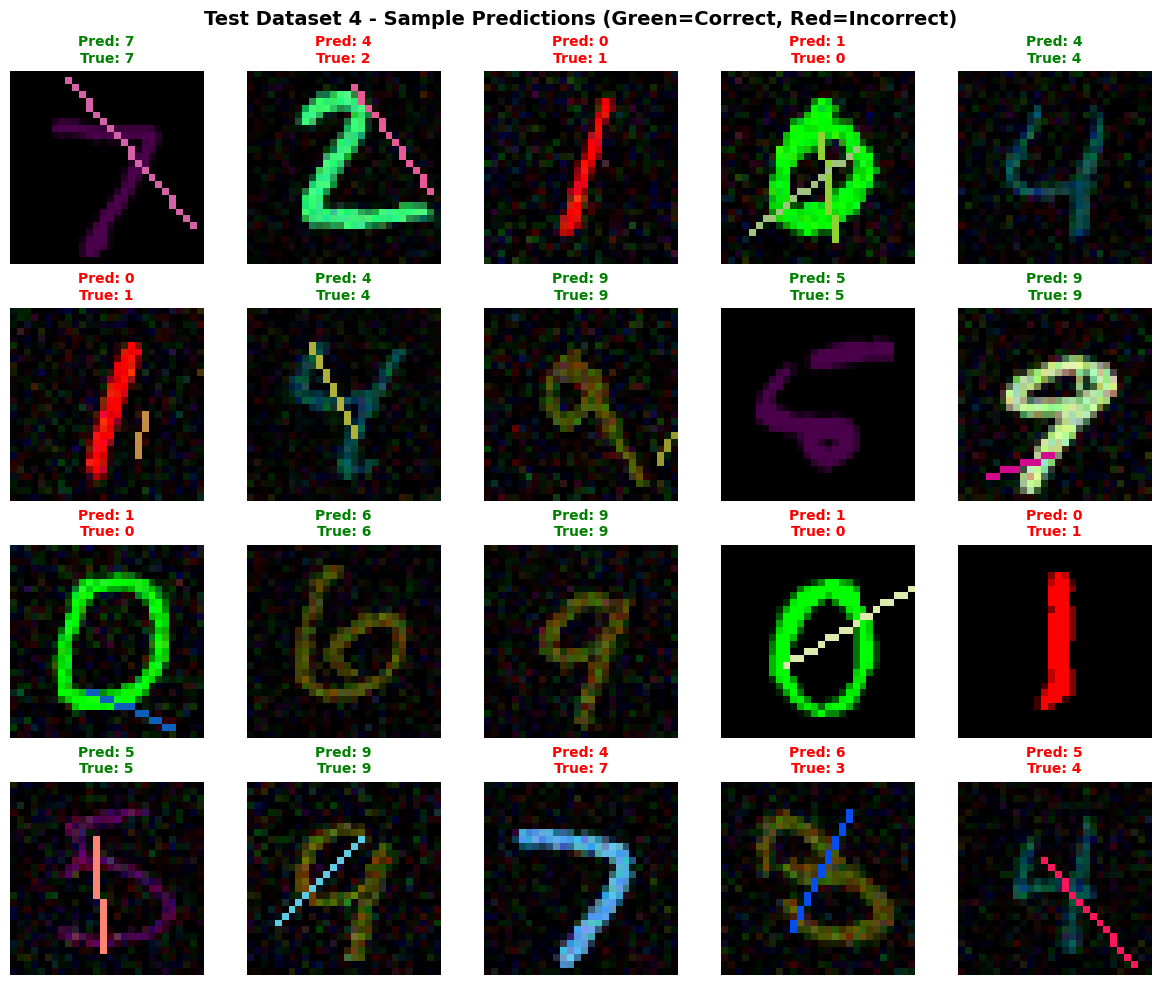


Test Dataset 4 - Correct predictions: 6885/10000 (68.85%)


In [108]:
# Make predictions on test dataset 4 (no learning)
model.eval()
test4_predictions = []
test4_targets = []

with torch.no_grad():
    for data, target in test4_loader:
        data = data.to(device)
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        test4_predictions.extend(predicted.cpu().numpy())
        test4_targets.extend(target.numpy())

predicted_classes_test4 = np.array(test4_predictions)
y_test4_array = np.array(test4_targets)

# Visualize some predictions from test dataset 4
num_samples = 20
fig, axes = plt.subplots(4, 5, figsize=(12, 10))
axes = axes.ravel()

for i in range(num_samples):
    img_display = X_test4[i]

    axes[i].imshow(img_display)
    axes[i].axis('off')

    pred_label = predicted_classes_test4[i]
    true_label = y_test4_array[i]

    color = 'green' if pred_label == true_label else 'red'
    axes[i].set_title(f'Pred: {pred_label}\nTrue: {true_label}',
                      fontsize=10, color=color, fontweight='bold')

plt.suptitle('Test Dataset 4 - Sample Predictions (Green=Correct, Red=Incorrect)',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

correct = np.sum(predicted_classes_test4 == y_test4_array)
total = len(y_test4_array)
print(f"\nTest Dataset 4 - Correct predictions: {correct}/{total} ({correct/total*100:.2f}%)")

## 11. Evaluate on Test Dataset 5



In [109]:
# Evaluate on test dataset 5 (no learning - evaluation mode only)
model.eval()
test5_loss = 0.0
test5_correct = 0
test5_total = 0

with torch.no_grad():
    for data, target in test5_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        loss = criterion(output, target)

        test5_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        test5_total += target.size(0)
        test5_correct += (predicted == target).sum().item()

avg_test5_loss = test5_loss / len(test5_loader)
test5_accuracy = test5_correct / test5_total

print(f"\nTest Dataset 5 Results:")
print(f"Test Loss: {avg_test5_loss:.4f}")
print(f"Test Accuracy: {test5_accuracy:.4f} ({test5_accuracy*100:.2f}%)")


Test Dataset 5 Results:
Test Loss: 14.5839
Test Accuracy: 0.5049 (50.49%)


## Predicting and visualising - Dataset 5



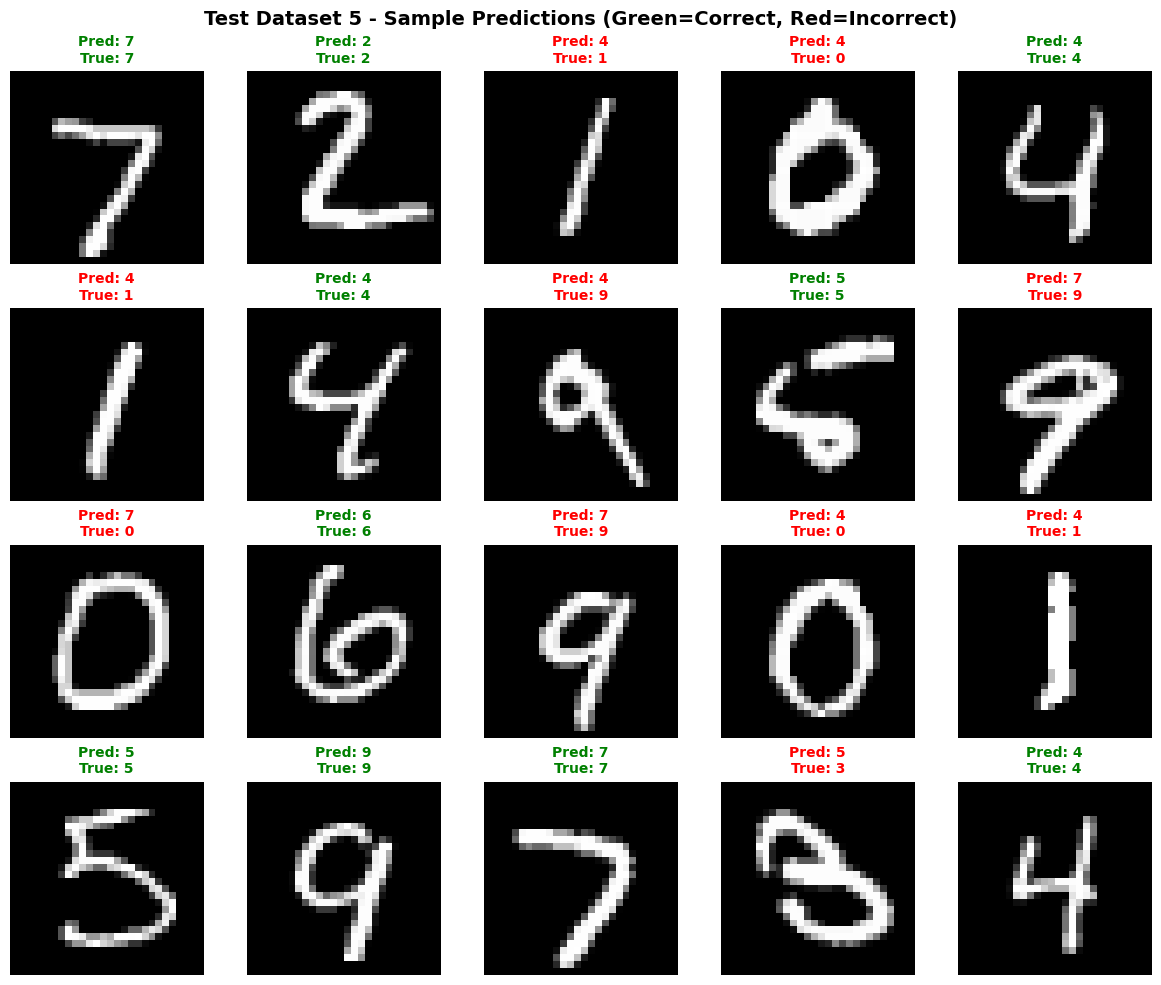


Test Dataset 5 - Correct predictions: 5049/10000 (50.49%)


In [110]:
# Make predictions on test dataset 5 (no learning)
model.eval()
test5_predictions = []
test5_targets = []

with torch.no_grad():
    for data, target in test5_loader:
        data = data.to(device)
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        test5_predictions.extend(predicted.cpu().numpy())
        test5_targets.extend(target.numpy())

predicted_classes_test5 = np.array(test5_predictions)
y_test5_array = np.array(test5_targets)

# Visualize some predictions from test dataset 5
num_samples = 20
fig, axes = plt.subplots(4, 5, figsize=(12, 10))
axes = axes.ravel()

for i in range(num_samples):
    img_display = X_test5[i]

    axes[i].imshow(img_display)
    axes[i].axis('off')

    pred_label = predicted_classes_test5[i]
    true_label = y_test5_array[i]

    color = 'green' if pred_label == true_label else 'red'
    axes[i].set_title(f'Pred: {pred_label}\nTrue: {true_label}',
                      fontsize=10, color=color, fontweight='bold')

plt.suptitle('Test Dataset 5 - Sample Predictions (Green=Correct, Red=Incorrect)',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

correct = np.sum(predicted_classes_test5 == y_test5_array)
total = len(y_test5_array)
print(f"\nTest Dataset 5 - Correct predictions: {correct}/{total} ({correct/total*100:.2f}%)")

##  Visualize Training History: (Underfit or Overfit  or Balance ?)

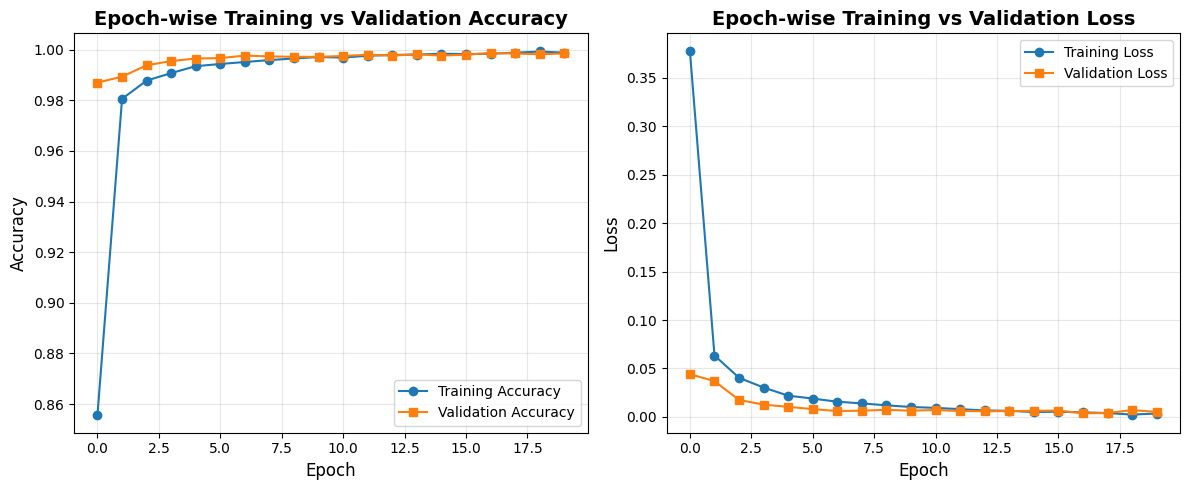

In [111]:
# Plot 1: Training vs Validation Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_acc_history, label='Training Accuracy', marker='o')
plt.plot(val_acc_history, label='Validation Accuracy', marker='s')
plt.title('Epoch-wise Training vs Validation Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# Plot 2: Training vs Validation Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss_history, label='Training Loss', marker='o')
plt.plot(val_loss_history, label='Validation Loss', marker='s')
plt.title('Epoch-wise Training vs Validation Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Save the Model (Optional)

In [112]:
# Save the trained model
import os
os.makedirs('models', exist_ok=True)

# Save complete model
torch.save(model.state_dict(), 'task1_v3.pth')
print("Model saved successfully!")

# To load the model later:
# model = CNN3Layer(num_classes=10)
# model.load_state_dict(torch.load('task1_v3.pth'))
# model.to(device)

Model saved successfully!


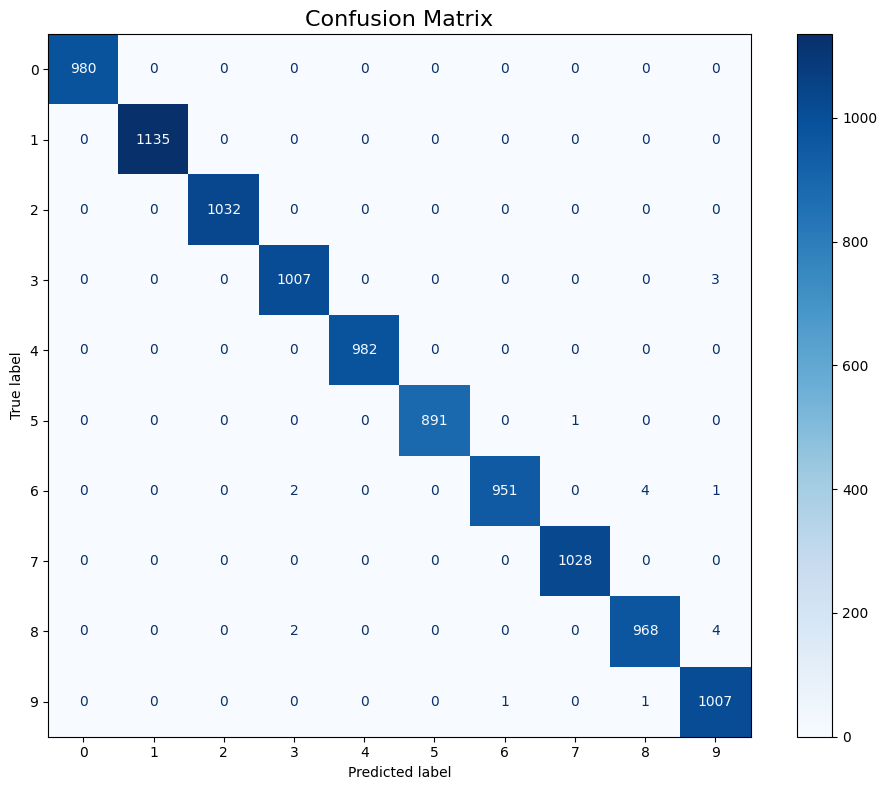


Per-class Accuracy:
Digit 0: 100.00%
Digit 1: 100.00%
Digit 2: 100.00%
Digit 3: 99.70%
Digit 4: 100.00%
Digit 5: 99.89%
Digit 6: 99.27%
Digit 7: 100.00%
Digit 8: 99.38%
Digit 9: 99.80%


In [113]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set model to evaluation mode
model.eval()

# Get predictions on test set
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test1_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title('Confusion Matrix', fontsize=16)
plt.tight_layout()
plt.show()

# Print classification metrics per class
print("\nPer-class Accuracy:")
for i in range(10):
    if cm[i].sum() > 0:
        class_acc = cm[i, i] / cm[i].sum() * 100
        print(f"Digit {i}: {class_acc:.2f}%")

## Confusion Matrix of model on Dataset 2 ( Green 0 and Red 1 no noise = Easy)

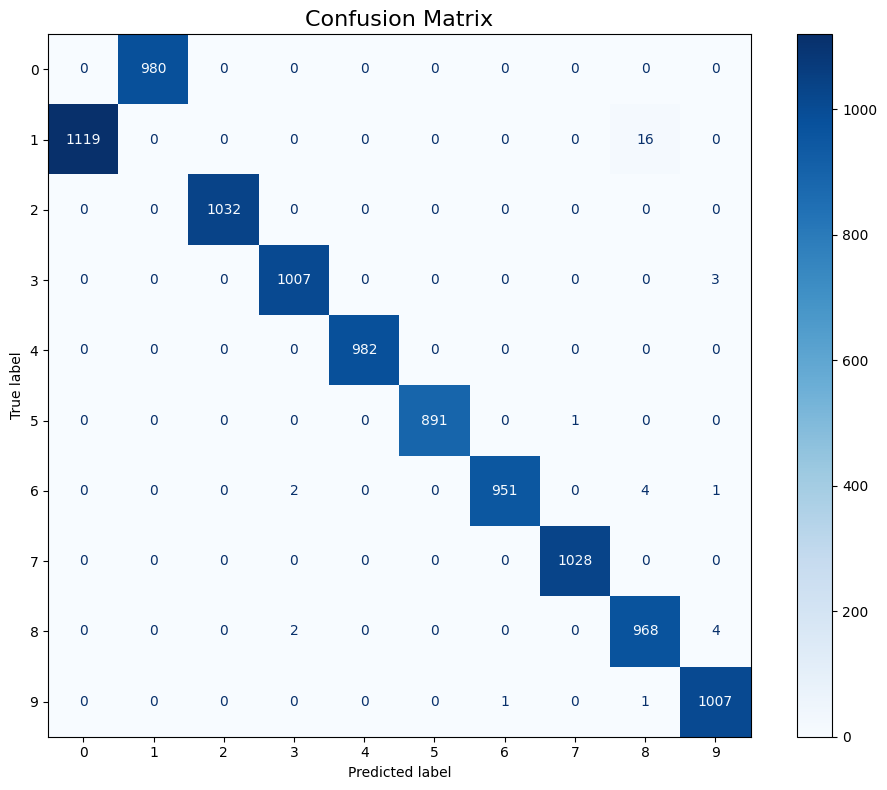


Per-class Accuracy:
Digit 0: 0.00%
Digit 1: 0.00%
Digit 2: 100.00%
Digit 3: 99.70%
Digit 4: 100.00%
Digit 5: 99.89%
Digit 6: 99.27%
Digit 7: 100.00%
Digit 8: 99.38%
Digit 9: 99.80%


In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set model to evaluation mode
model.eval()

# Get predictions on test set
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test2_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title('Confusion Matrix', fontsize=16)
plt.tight_layout()
plt.show()

# Print classification metrics per class
print("\nPer-class Accuracy:")
for i in range(10):
    if cm[i].sum() > 0:
        class_acc = cm[i, i] / cm[i].sum() * 100
        print(f"Digit {i}: {class_acc:.2f}%")

## Confusion Matrix of model on Dataset 3 ( Green 0 and Red 1, other digits coloured, foreground lines + background noise = Hard)

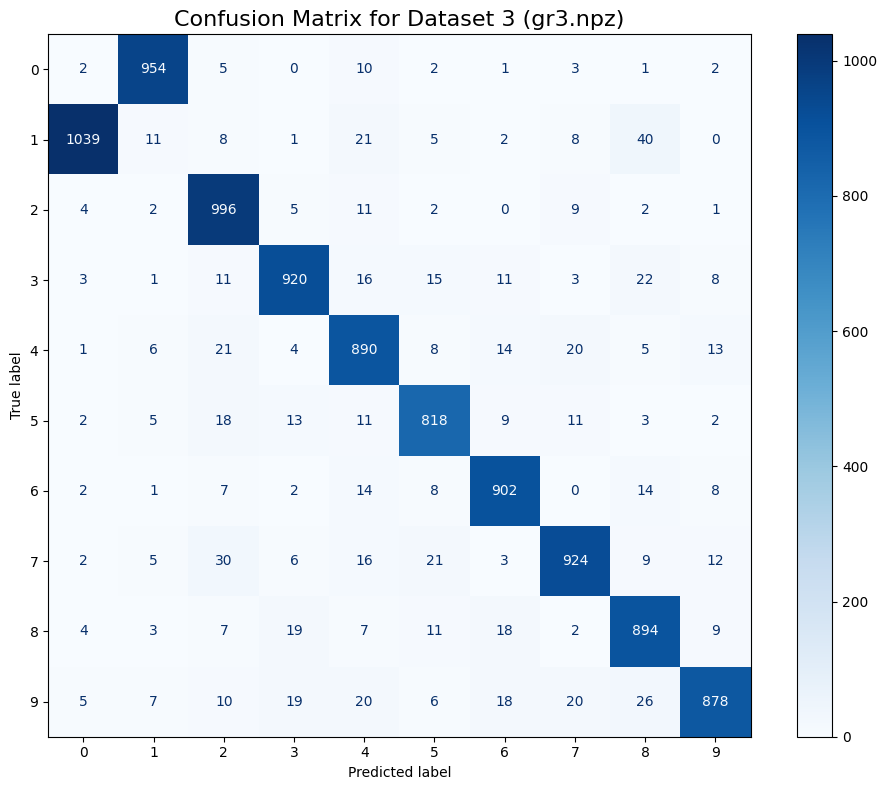


Per-class Accuracy:
Digit 0: 0.20%
Digit 1: 0.97%
Digit 2: 96.51%
Digit 3: 91.09%
Digit 4: 90.63%
Digit 5: 91.70%
Digit 6: 94.15%
Digit 7: 89.88%
Digit 8: 91.79%
Digit 9: 87.02%


In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set model to evaluation mode
model.eval()

# Get predictions on test set
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test3_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title('Confusion Matrix for Dataset 3 (gr3.npz)', fontsize=16)
plt.tight_layout()
plt.show()

# Print classification metrics per class
print("\nPer-class Accuracy:")
for i in range(10):
    if cm[i].sum() > 0:
        class_acc = cm[i, i] / cm[i].sum() * 100
        print(f"Digit {i}: {class_acc:.2f}%")

## Confusion Matrix of model on Dataset 4 ( Green 0 and Red 1, other digits coloured, more foreground lines + more background noise = More Hard)

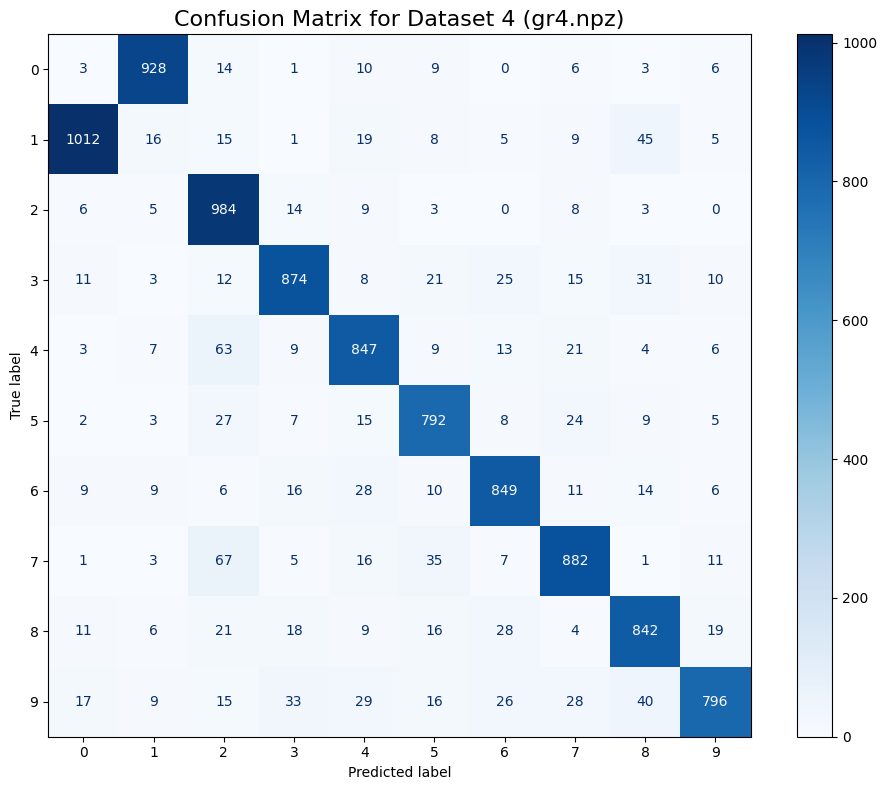


Per-class Accuracy:
Digit 0: 0.31%
Digit 1: 1.41%
Digit 2: 95.35%
Digit 3: 86.53%
Digit 4: 86.25%
Digit 5: 88.79%
Digit 6: 88.62%
Digit 7: 85.80%
Digit 8: 86.45%
Digit 9: 78.89%


In [116]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set model to evaluation mode
model.eval()

# Get predictions on test set
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test4_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title('Confusion Matrix for Dataset 4 (gr4.npz)', fontsize=16)
plt.tight_layout()
plt.show()

# Print classification metrics per class
print("\nPer-class Accuracy:")
for i in range(10):
    if cm[i].sum() > 0:
        class_acc = cm[i, i] / cm[i].sum() * 100
        print(f"Digit {i}: {class_acc:.2f}%")

## Confusion Matrix of model on Dataset 5 ( Black backgorund White digits no noise = Model learnt color or shapes)

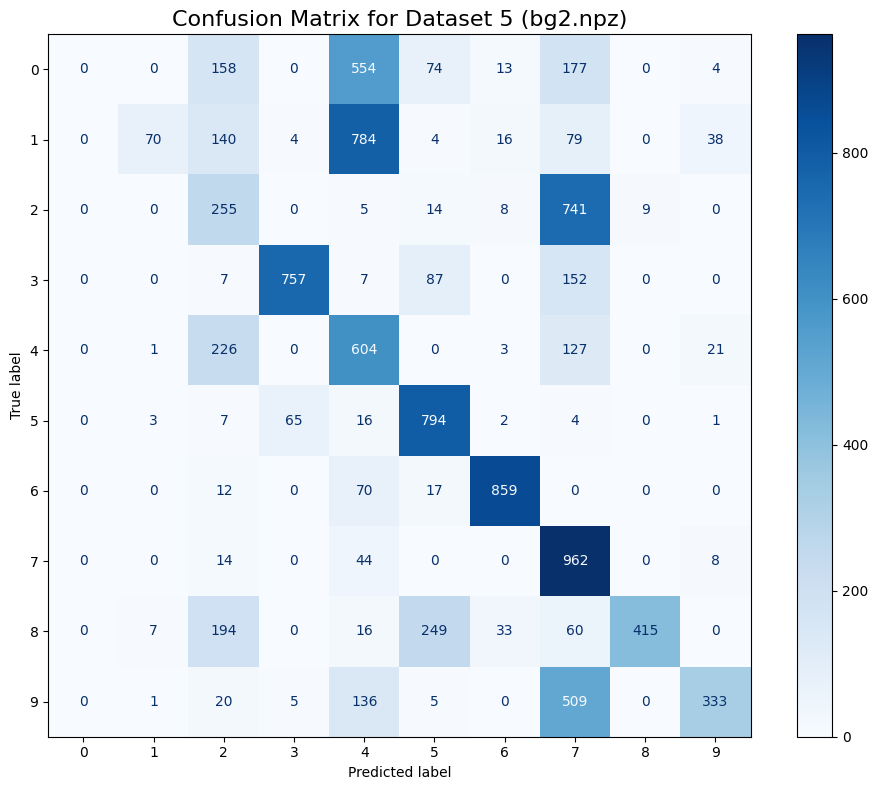


Per-class Accuracy:
Digit 0: 0.00%
Digit 1: 6.17%
Digit 2: 24.71%
Digit 3: 74.95%
Digit 4: 61.51%
Digit 5: 89.01%
Digit 6: 89.67%
Digit 7: 93.58%
Digit 8: 42.61%
Digit 9: 33.00%


In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set model to evaluation mode
model.eval()

# Get predictions on test set
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test5_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title('Confusion Matrix for Dataset 5 (bg2.npz)', fontsize=16)
plt.tight_layout()
plt.show()

# Print classification metrics per class
print("\nPer-class Accuracy:")
for i in range(10):
    if cm[i].sum() > 0:
        class_acc = cm[i, i] / cm[i].sum() * 100
        print(f"Digit {i}: {class_acc:.2f}%")

## Plotting accuracy of model over digits over all 5 datasets


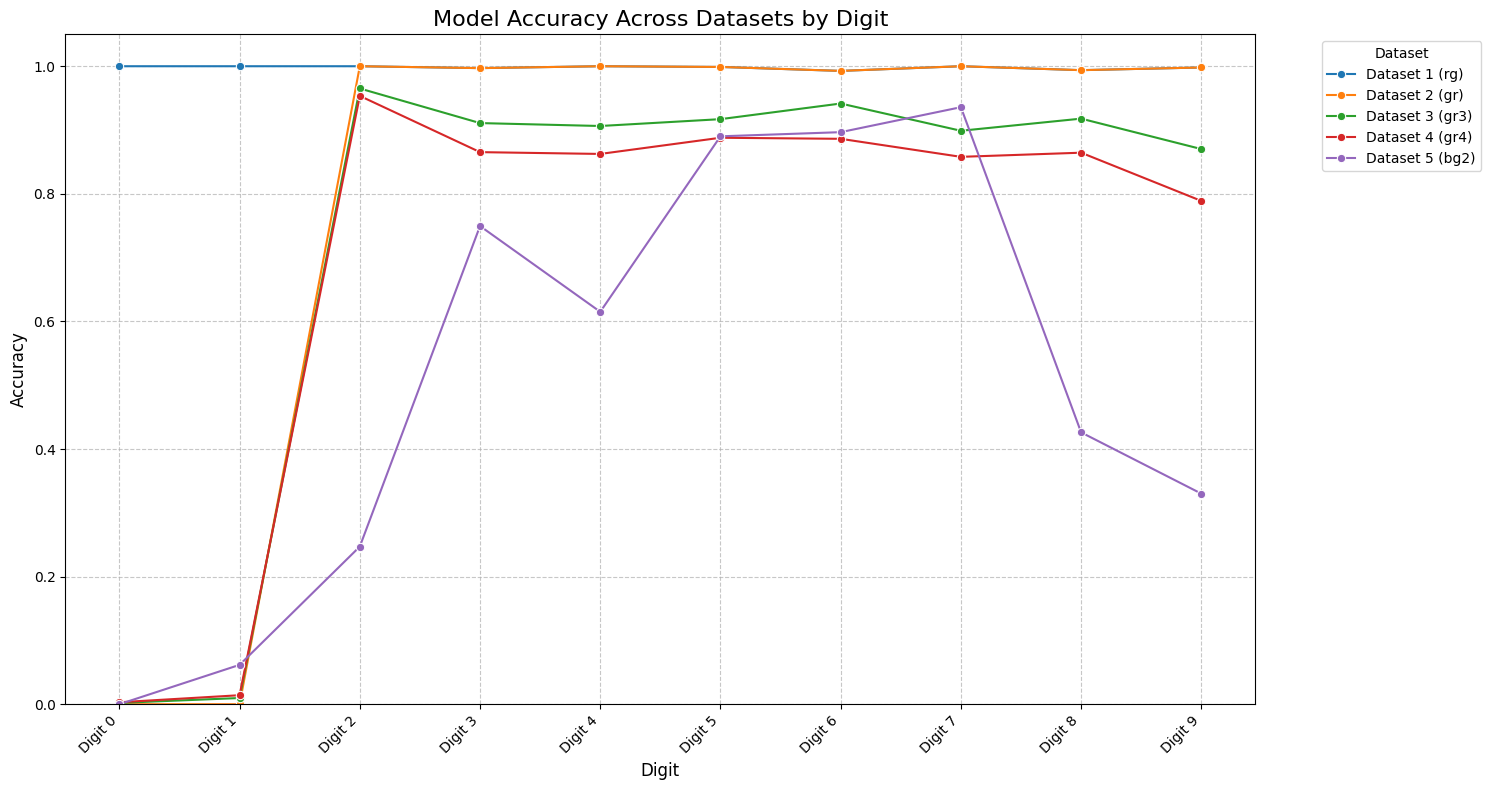

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch

def evaluate_and_get_accuracies(model, data_loader, criterion, device, dataset_name):
    model.eval()
    all_preds = []
    all_labels = []
    test_loss = 0.0
    test_correct = 0
    test_total = 0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)

            test_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            test_total += target.size(0)
            test_correct += (predicted == target).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(target.cpu().numpy())

    avg_test_loss = test_loss / len(data_loader)
    overall_accuracy = test_correct / test_total

    # Calculate per-class accuracy
    cm = confusion_matrix(all_labels, all_preds, labels=range(10))
    per_class_accuracy = []
    for i in range(10):
        class_acc = cm[i, i] / cm[i].sum() if cm[i].sum() > 0 else 0.0
        per_class_accuracy.append(class_acc)

    return {
        'dataset_name': dataset_name,
        'overall_accuracy': overall_accuracy,
        'per_class_accuracy': per_class_accuracy,
        'avg_loss': avg_test_loss  # Included for completeness
    }

# 1. Define the datasets list (if not already defined)
test_datasets = [
    (test1_loader, 'Dataset 1 (rg)'),
    (test2_loader, 'Dataset 2 (gr)'),
    (test3_loader, 'Dataset 3 (gr3)'),
    (test4_loader, 'Dataset 4 (gr4)'),
    (test5_loader, 'Dataset 5 (bg2)')
]

# 2. Run Evaluation
results = []
for loader, name in test_datasets:
    result = evaluate_and_get_accuracies(model, loader, criterion, device, name)
    results.append(result)

# 3. Prepare Data for Plotting
digit_plot_data = []
overall_plot_data = []

for res in results:
    # Data for the Bar Plot
    overall_plot_data.append({
        'Dataset': res['dataset_name'],
        'Accuracy': res['overall_accuracy'],
        'Loss': res['avg_loss']
    })

    # Data for the Line Plot
    for i, acc in enumerate(res['per_class_accuracy']):
        digit_plot_data.append({
            'Dataset': res['dataset_name'],
            'Category': f'Digit {i}',
            'Accuracy': acc
        })

df_digits = pd.DataFrame(digit_plot_data)
df_overall = pd.DataFrame(overall_plot_data)

# --- LINE PLOT (Digits Only) ---
plt.figure(figsize=(15, 8))
# sort=False ensures Digits 0-9 stay in order
sns.lineplot(data=df_digits, x='Category', y='Accuracy', hue='Dataset', marker='o', sort=False)

plt.title('Model Accuracy Across Datasets by Digit', fontsize=16)
plt.xlabel('Digit', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Plotting model accuracy over every dataset

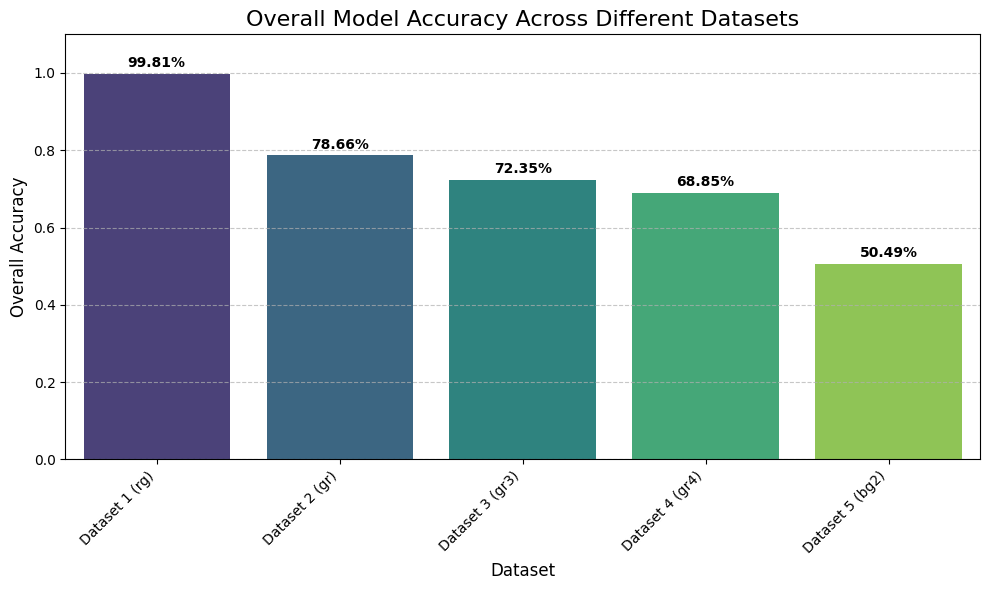

In [119]:
# --- CELL: BAR PLOT (Overall Only) ---
plt.figure(figsize=(10, 6))

# We use df_overall directly (no filtering needed)
sns.barplot(x='Dataset', y='Accuracy', data=df_overall, hue='Dataset', palette='viridis', legend=False)

# Add text labels on top of bars to show the exact percentage
for i, val in enumerate(df_overall['Accuracy']):
    plt.text(i, val + 0.01, f'{val:.2%}', ha='center', va='bottom', fontweight='bold')

plt.title('Overall Model Accuracy Across Different Datasets', fontsize=16)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Overall Accuracy', fontsize=12)
plt.ylim(0, 1.1) # Set limit slightly higher than 1.0 to fit text labels
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()